## MNIST распознавание рукописных цифр


In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

data = load_digits()
X, y = data.data, data.target
X[0,:].reshape([8, 8])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

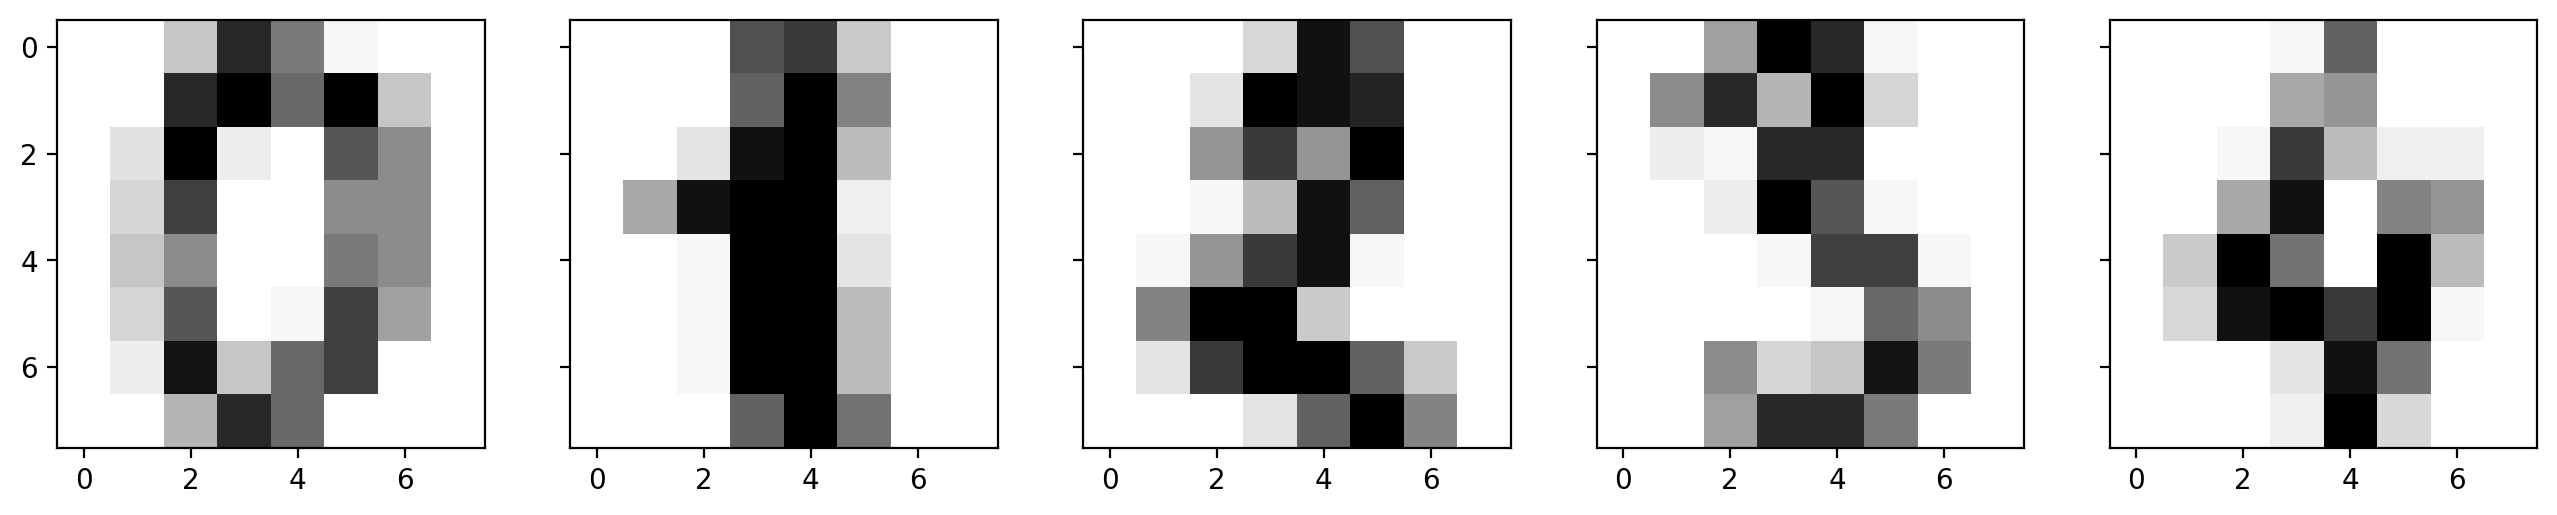

In [28]:
f, axes = plt.subplots(1, 5, sharey=True, figsize=(16, 6))
for i in range(5):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Grays")

Разделим датасет, на тренировочную и тестовою выборки. Затем обучим 2 классификатора со случайными параметрами

In [38]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
)

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [41]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.975925925925926, 0.6666666666666666)

Колличество правильных предсказаний knn, значительно выше.

Подберем параметы кросс-валидацией.

In [44]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], # в датасете 64 фичи
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [45]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, np.float64(0.8560266869031808))

In [46]:
np.mean(
    cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5) # 5-фолдовая кросс-валидация
)  # 0.987

np.float64(0.9864858028204642)

Затюним knn

In [52]:
knn_params = {"knn__n_neighbors": range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=1, verbose=True)
knn_grid.fit(X_train, y_train)
#knn_grid.best_params_, knn_grid.best_score_
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             n_jobs=1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [50]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.9703703703703703

In [53]:
knn_grid.predict(X_holdout)

array([1, 2, 7, 3, 9, 5, 8, 9, 8, 1, 4, 3, 5, 0, 9, 8, 5, 3, 9, 6, 6, 3,
       6, 4, 6, 2, 6, 7, 3, 1, 8, 4, 1, 1, 0, 2, 3, 5, 5, 5, 5, 6, 0, 5,
       3, 5, 1, 8, 2, 3, 9, 4, 0, 3, 8, 1, 1, 1, 0, 4, 1, 2, 0, 7, 9, 8,
       8, 6, 0, 8, 8, 3, 4, 6, 4, 3, 2, 3, 9, 7, 5, 8, 3, 5, 1, 8, 9, 5,
       4, 7, 7, 8, 3, 0, 2, 7, 8, 9, 4, 0, 5, 6, 4, 0, 1, 3, 3, 1, 8, 7,
       4, 2, 5, 5, 3, 9, 6, 4, 2, 7, 4, 1, 8, 5, 1, 5, 1, 6, 5, 5, 4, 9,
       4, 2, 7, 8, 4, 4, 4, 9, 7, 1, 3, 9, 2, 0, 0, 3, 5, 8, 1, 9, 5, 3,
       6, 8, 7, 4, 6, 1, 9, 7, 6, 4, 0, 9, 4, 3, 0, 9, 8, 5, 5, 2, 2, 1,
       5, 1, 6, 9, 2, 8, 9, 9, 0, 4, 4, 7, 0, 1, 5, 8, 2, 9, 9, 6, 0, 3,
       9, 5, 6, 3, 9, 6, 2, 4, 7, 3, 0, 6, 9, 2, 8, 0, 3, 5, 8, 5, 9, 9,
       2, 7, 0, 6, 9, 0, 5, 1, 4, 5, 3, 0, 9, 2, 8, 1, 4, 2, 8, 0, 8, 1,
       3, 3, 3, 6, 2, 1, 9, 9, 0, 4, 5, 2, 8, 3, 1, 7, 5, 1, 4, 9, 1, 2,
       2, 0, 4, 2, 0, 3, 8, 7, 3, 3, 9, 3, 7, 6, 4, 8, 3, 7, 1, 6, 4, 2,
       3, 7, 5, 6, 4, 3, 7, 6, 7, 1, 1, 7, 9, 6, 3,

**Вывод:** knn показала себя сильно лучше, чем decision tree. Так же стоит сначала проверять просты модели